# Insurance Claim Prediction

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('insurance2.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

<AxesSubplot:>

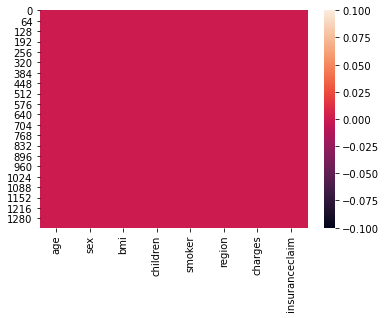

In [5]:
#Checking for null values
sns.heatmap(df.isnull())

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='count'>

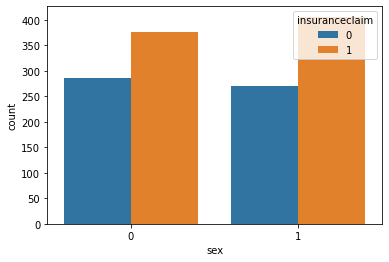

In [9]:
sns.countplot(x='sex',hue='insuranceclaim',data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

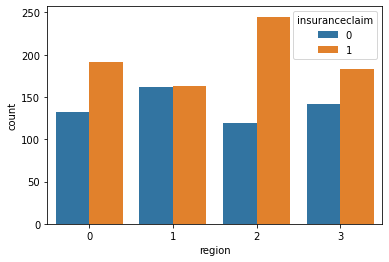

In [10]:
sns.countplot(x='region',hue='insuranceclaim',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

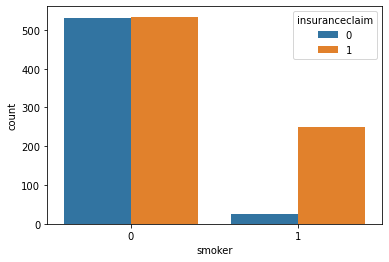

In [11]:
sns.countplot(x='smoker',hue='insuranceclaim',data=df)

<AxesSubplot:xlabel='charges'>

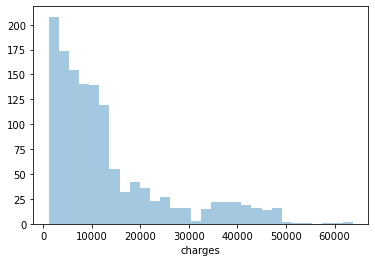

In [12]:
x = df['charges']
sns.distplot(x,kde=False)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

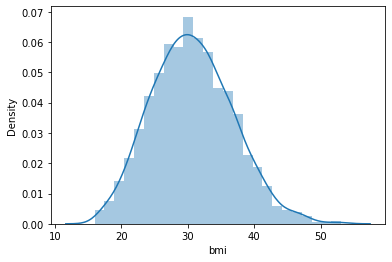

In [13]:
x = df['bmi']
sns.distplot(x)

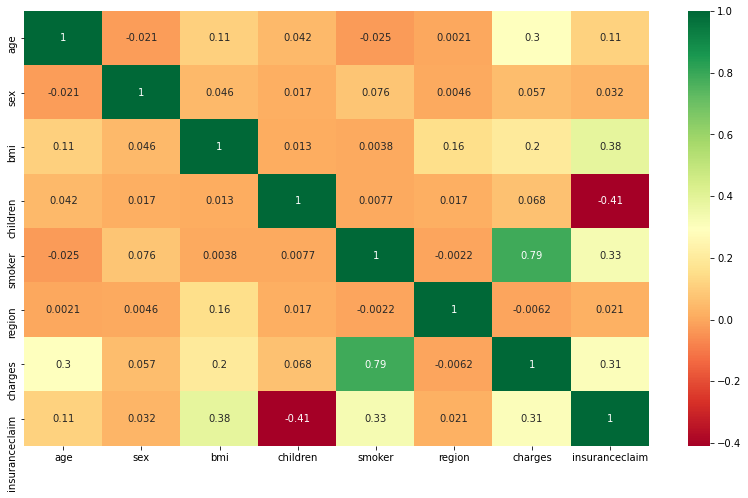

In [14]:
#Plotting correlation
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
import seaborn as sns
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
#Assigning labels
X = df.iloc[ :, :7]
y = df.iloc[:, -1:]

In [16]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [18]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

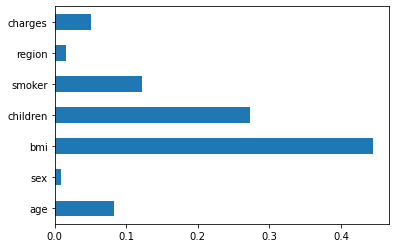

In [19]:
##To plot feature importances
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.plot(kind='barh')

In [20]:
#Assigning training and testing value
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
#Performing scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler=sc.fit(X)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
#Using RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=1700,random_state=5)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1700, random_state=5)

In [24]:
predict = rf.predict(X_test)

Accuracy ::  0.9328358208955224
Precision ::  0.9567901234567902


[Text(0.5, 15.0, 'predict'), Text(33.0, 0.5, 'true')]

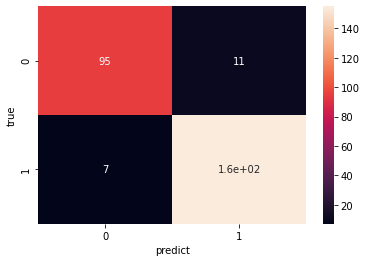

In [25]:
from sklearn import metrics
print('Accuracy :: ',metrics.accuracy_score(y_test,predict))
print('Precision :: ',metrics.precision_score(y_test,predict))
from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')

In [26]:
#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='log2')

param_grid = {
    'n_estimators' : [50,1000],
    'max_depth': [1,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,1000]
}


CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print (CV_rfc.best_params_)

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 0}


Accuracy ::  0.9402985074626866
Precision ::  0.9518072289156626


[Text(0.5, 15.0, 'predict'), Text(33.0, 0.5, 'true')]

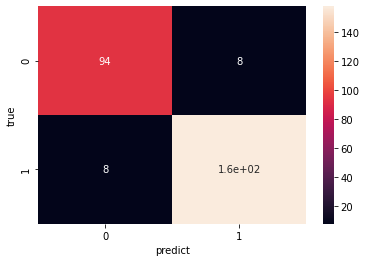

In [27]:
#Using RandomForestClassifier model using the tuned parameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_depth=100,random_state=1000,max_features='log2')
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

from sklearn import metrics
print('Accuracy :: ',metrics.accuracy_score(y_test,predict))
print('Precision :: ',metrics.precision_score(y_test,predict))
from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')